Data from Our World in Data, https://github.com/owid/covid-19-data 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as md

sns.set_theme(style="darkgrid")
%config Completer.use_jedi = False # otherwise autocomplete doesn't work on Mac

In [2]:
vaccine_file = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.json"
vaccination_data_df = pd.read_json(vaccine_file)

In [3]:
def get_first_dose(data_df, country, population):
    data = data_df.query("country == @country").data
    df = pd.DataFrame(data.array[0])
    df['people_vaccinated'] = df['people_vaccinated'].fillna(df['total_vaccinations']) # before there were 2nd doses
    df = df[["date", "people_vaccinated"]]
    df[country] = df.people_vaccinated / population * 100
    df["datetime"] = pd.to_datetime(df.date)
    df = df.set_index("datetime")
    return df[[country]]

In [4]:
df_ca = get_first_dose(vaccination_data_df, "Canada", 37590000)
df_us = get_first_dose(vaccination_data_df, "United States", 328200000)
df_uk = get_first_dose(vaccination_data_df, "United Kingdom", 66650000)
df_is = get_first_dose(vaccination_data_df, "Israel", 9053000)

In [5]:
df = df_is.join(df_uk, how="outer").join(df_us, how="outer").join(df_ca, how="outer")

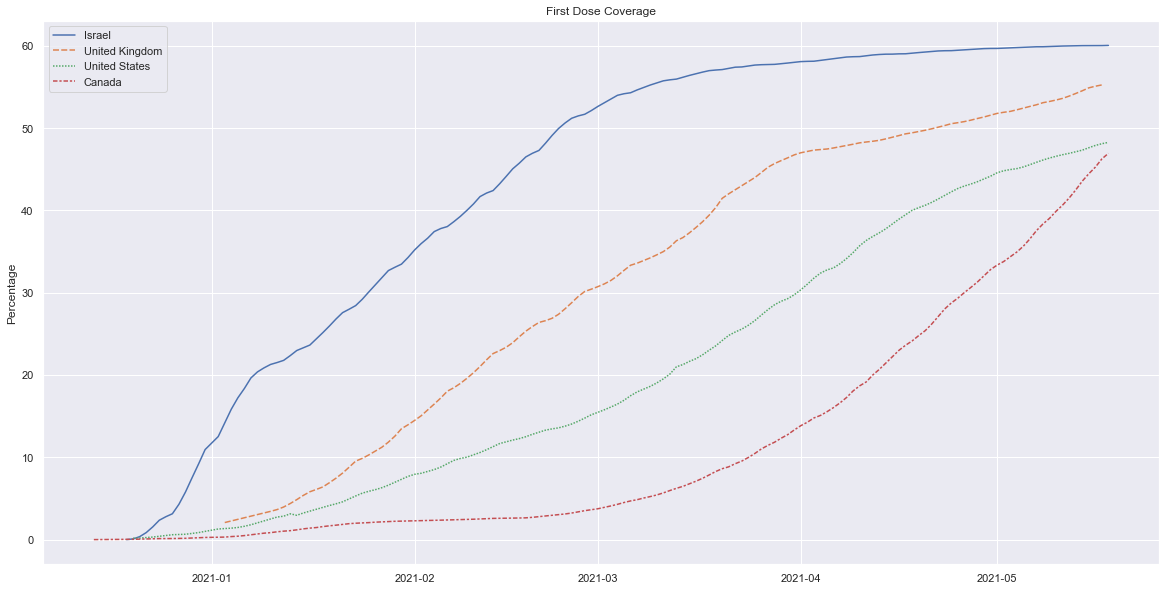

In [6]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(data=df)

ax.set(xlabel='', ylabel='Percentage')
ax.xaxis.set_major_locator(md.MonthLocator())
ax.legend()

# Rotate tick marks on x-axis
# plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("First Dose Coverage")
plt.show()

In [9]:
df.to_json("../public/dose_stats.json")

In [13]:
df.tail(20)

,Israel,United Kingdom,United States,Canada
datetime,,,,
2021-04-29,59.641776,51.337758,43.812786,32.055914
2021-04-30,59.660941,51.556197,44.148259,32.801500
2021-05-01,59.665028,51.771013,44.557955,33.345424
2021-05-02,59.699912,51.905932,44.804087,33.776797
2021-05-03,59.737336,52.014860,44.947512,34.356512
2021-05-04,59.774561,52.205662,45.062362,34.924464
2021-05-05,59.808804,52.414360,45.265963,35.632096
2021-05-06,59.846747,52.617616,45.539995,36.521756
2021-05-07,59.865028,52.817167,45.830761,37.521053
